In [10]:
! zip /kaggle/working/sbermarket_tab_2_sample_submission.zip /kaggle/working/sbermarket_tab_2_sample_submission.csv

  adding: kaggle/working/sbermarket_tab_2_sample_submission.csv (deflated 75%)


In [11]:
! ls - l /kaggle/working/

ls: cannot access '-': No such file or directory
ls: cannot access 'l': No such file or directory
/kaggle/working/:
__notebook_source__.ipynb		sbermarket_tab_2_sample_submission.zip
sbermarket_tab_2_sample_submission.csv


In [1]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
from tqdm.auto import tqdm

In [2]:


tabs_dict = dict()
tabs_dict['sbermarket_tab_2_1'] = ['tab_2_products_2020-01-01.csv',  'tab_2_products_2020-02-20.csv', 'tab_2_products_2020-01-11.csv',  'tab_2_products_2020-03-01.csv',
                                   'tab_2_products_2020-01-21.csv',  'tab_2_products_2020-03-11.csv','tab_2_products_2020-01-31.csv',  'tab_2_products_2020-03-21.csv',
                                   'tab_2_products_2020-02-10.csv',  'tab_2_products_2020-03-31.csv']

tabs_dict['sbermarket_tab_2_2'] = ['tab_2_products_2020-04-10.csv',  'tab_2_products_2020-04-30.csv', 'tab_2_products_2020-04-20.csv']
tabs_dict['sbermarket_tab_2_3'] = ['tab_2_products_2020-05-10.csv',  'tab_2_products_2020-05-30.csv', 'tab_2_products_2020-05-20.csv']
tabs_dict['sbermarket_tab_2_4'] = ['tab_2_products_2020-06-09.csv',  'tab_2_products_2020-06-29.csv', 'tab_2_products_2020-06-19.csv']
tabs_dict['sbermarket_tab_2_5'] = ['tab_2_products_2020-07-09.csv', 'tab_2_products_2020-07-29.csv', 'tab_2_products_2020-07-19.csv']
tabs_dict['sbermarket_tab_2_6'] = ['tab_2_products_2020-08-08.csv', 'tab_2_products_2020-08-28.csv', 'tab_2_products_2020-08-18.csv',  'tab_2_products_2020-09-07.csv']

sample_submission = pd.read_csv('/kaggle/input/test-recsys/sample_submission.csv')
sample_submission_user_id_set = set(sample_submission.Id.values)



In [3]:
sbermarket_tab_2_sample_submission = []
for tab_name in tqdm(tabs_dict):
    for file_name in tabs_dict[tab_name]:
        tmp = pd.read_csv('/kaggle/input/test-recsys/' + tab_name + '/' + file_name)
        tmp = tmp[tmp.user_id.apply(lambda s : s in sample_submission_user_id_set)]
        sbermarket_tab_2_sample_submission.append(tmp)
sbermarket_tab_2_sample_submission = pd.concat(sbermarket_tab_2_sample_submission)

In [4]:
sbermarket_tab_2_sample_submission.head()

,user_id,order_id,line_item_id,price,quantity,discount,product_name,product_id,brand_name,master_category_id,parent_category_id
14,766,5395508,28998751,24.270000,3,0.000000,Вода минеральная Славяновская среднегазированн...,3069043,Славяновская,77.0,74
15,766,5395508,28998796,79.300003,3,0.000000,"Молоко Маруся пастеризованное 3,5-4,5% 930 мл",3041849,Маруся,26.0,20
16,766,5395508,28999083,76.620003,5,15.070000,Творог Благода Крестьянский 12% 180 г,216,Благода,607.0,20
17,766,5395508,28999153,72.180000,1,19.540001,Сгущенное молоко Алексеевское цельное с сахаро...,1990,Алексеевское,32.0,20
18,766,5395508,28999278,142.500000,3,0.000000,"Сливочное масло Брест-Литовск 82,5% 180 г",3883053,Брест-Литовск,31.0,20


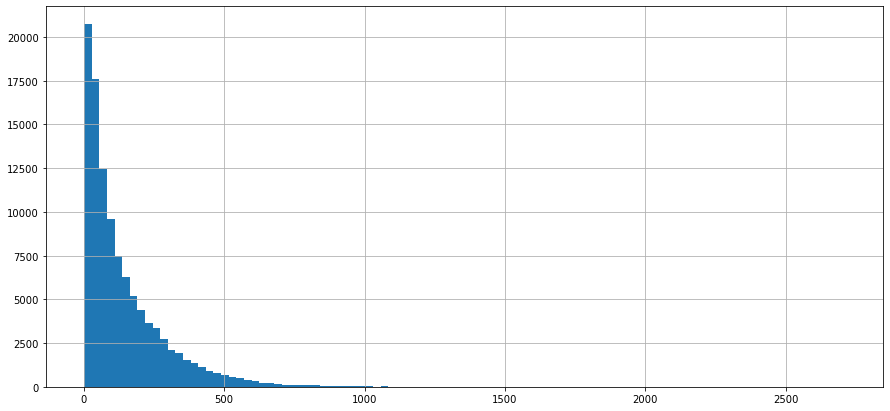

In [5]:
user_product_id_nunique = sbermarket_tab_2_sample_submission.groupby('user_id').product_id.nunique().to_frame('product_id_nunique').reset_index()
user_product_id_nunique.product_id_nunique.hist(bins=100, figsize=(15, 7))

In [4]:
# order_data = pd.read_csv('/kaggle/input/test-recsys/kaggle_tab_1345/tab_1_orders.csv')
# order_data_sample_sibmission = order_data[order_data.user_id.apply(lambda s: s in sample_submission_user_id_set)]
# order_data_sample_sibmission.order_created_time = pd.to_datetime(order_data_sample_sibmission.order_created_time)
# order_data_sample_sibmission.order_created_time.min(), order_data_sample_sibmission.order_created_time.max()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(Timestamp('2019-12-31 21:29:17'), Timestamp('2020-10-01 20:59:11'))

In [5]:
# order_data_sample_sibmission = order_data_sample_sibmission.drop_duplicates()
# order_data_sample_sibmission.index=range(len(order_data_sample_sibmission))

In [6]:
# order_data_sample_sibmission.order_id.nunique(), order_data_sample_sibmission.order_created_time.nunique()

(953436, 918116)

In [7]:
# order_data_nuni = order_data_sample_sibmission.groupby(['user_id', 'order_id', 'order_created_time']).nunique().reset_index()

In [8]:
# order_data_nuni[(order_data_nuni.retailer > 1) | (order_data_nuni.store_id > 1) | (order_data_nuni.platform > 1)]

,user_id,order_id,order_created_time,retailer,store_id,platform
79,1221,15907144,2020-08-31 21:49:38,2,2,1
103,1578,13688391,2020-07-20 06:15:12,2,2,1
152,2693,9176055,2020-04-28 14:23:32,2,2,1
198,3011,12424110,2020-06-22 15:34:09,2,2,1
427,5007,8508981,2020-04-15 10:41:27,2,2,1
...,...,...,...,...,...,...
953184,3138790,16813468,2020-09-16 13:44:41,2,2,1
953266,3140184,16777404,2020-09-16 03:15:04,2,2,1
953275,3140514,10954210,2020-05-29 04:10:18,2,2,1
953276,3140514,16819878,2020-09-16 15:50:03,2,2,1


In [9]:
# order_data_nuni.order_id.nunique()

953436

In [10]:
# order_set =  set(sbermarket_tab_2_sample_submission.order_id.values)

In [11]:
# order_data_nuni = order_data_nuni[order_data_nuni.order_id.apply(lambda s : s in order_set)]

In [12]:
# order_data_nuni.order_id.nunique()

792285

In [13]:
# sbermarket_tab_2_sample_submission_merged = pd.merge(sbermarket_tab_2_sample_submission, order_data_sample_sibmission, on=['user_id', 'order_id'])

In [14]:
# sbermarket_tab_2_sample_submission_merged.shape, sbermarket_tab_2_sample_submission.shape

((21267015, 15), (21677070, 11))

In [6]:
user_product_id_nunique_less50 = user_product_id_nunique[user_product_id_nunique.product_id_nunique <= 50]
user_product_id_nunique_more50 = user_product_id_nunique[user_product_id_nunique.product_id_nunique > 50]
user_product_id_nunique_less50.shape, user_product_id_nunique_more50.shape

((35659, 2), (71409, 2))

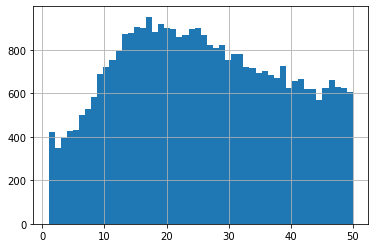

In [7]:
user_product_id_nunique_less50.product_id_nunique.hist(bins=50)

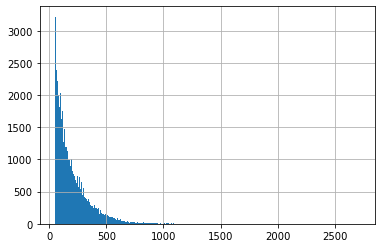

In [8]:
user_product_id_nunique_more50.product_id_nunique.hist(bins=500)

In [30]:
# my_dummy_submission = sbermarket_tab_2_sample_submission[['user_id', 'product_id']].copy()
# my_dummy_submission['product_id']  = my_dummy_submission['product_id'].apply(lambda s: str(s) + ' ')
# my_dummy_submission = my_dummy_submission.groupby('user_id').product_id.sum().to_frame('product_id').reset_index()
# my_dummy_submission.product_id = my_dummy_submission.product_id.apply(lambda s: s.split()[:50])
# my_dummy_submission['product_id_added'] = my_dummy_submission.product_id
# some_prod = my_dummy_submission.product_id_added.values[0]
# my_dummy_submission.product_id_added = my_dummy_submission.product_id_added.apply(lambda s: s + some_prod[:50-len(s)])
# dummy_submission = my_dummy_submission[['user_id', 'product_id_added']]
# dummy_submission['Predicted'] = dummy_submission.product_id_added.apply(lambda s: ' '.join(prod for prod in s))
# dummy_submission['Id'] = dummy_submission.user_id
# dummy_submission = dummy_submission[['Id', 'Predicted']]
# # dummy_submission.to_csv('/kaggle/working/dummy_submission.csv', index=False)

## Product vector

In [5]:
product_id_set = set(sbermarket_tab_2_sample_submission.product_id.unique())

In [6]:
len(product_id_set)

91994

In [7]:
product_prop = pd.read_csv('/kaggle/input/test-recsys/kaggle_tab_1345/tab_5_product_properties.csv')
print(product_prop.shape)
product_prop = product_prop[product_prop.product_id.apply(lambda s: s in product_id_set)]

(6990208, 3)


In [8]:
product_prop.product_id.nunique()

90134

In [28]:
# tmp = product_prop.groupby('property_name').product_id.nunique().to_frame('prods').reset_index()

In [9]:
# property_name_set = set(['Срок хранения','energy_value', 'Вес', 'protein', 'fat','Тип продукта', 'Вид упаковки', 'carbohydrate'])
# product_prop = product_prop[product_prop.property_name.apply(lambda s: s in property_name_set)]

property_name_set = set(['Тип продукта'])
product_prop1 = product_prop[product_prop.property_name.apply(lambda s: s in property_name_set)]


In [10]:
##TODO
# set1= set(product_prop.product_id.unique()).difference(set(product_prop1.product_id.unique()))
# len(set1)
# product_prop = pd.concat(product_prop1, )
product_prop = product_prop1.copy()

In [11]:
product_prop.loc[(product_prop.product_id == 3073831) & (product_prop.property_name == 'protein'), 'property_value'] = '7,4 г'
product_prop.loc[(product_prop.product_id == 3073831) & (product_prop.property_name == 'fat'), 'property_value'] = '0,3 г'

product_prop.loc[(product_prop.product_id == 14732) & (product_prop.property_name == 'carbohydrate'), 'property_value'] = '4,7 г'
product_prop.loc[(product_prop.product_id == 14732) & (product_prop.property_name == 'protein'), 'property_value'] = '16 г'

product_prop= product_prop.drop_duplicates()

In [12]:
my_prod_prop = pd.DataFrame(product_prop.set_index(['product_id', 'property_name']).unstack().reset_index().values, 
                           columns=['product_id', 'Тип продукта'])

In [234]:
# my_prod_prop['prod_in_type'] = 1
# my_prod_type =  pd.DataFrame(my_prod_prop.set_index(['product_id', 'Тип продукта']).unstack().reset_index().values, 
#                              columns = ['product_id'] + list(range(my_prod_prop['Тип продукта'].nunique())))

In [13]:
prod_type_encoder = dict(zip(my_prod_prop['Тип продукта'].unique(), range(my_prod_prop['Тип продукта'].nunique())))
my_prod_prop['prod_type'] = my_prod_prop['Тип продукта'].apply(lambda s: prod_type_encoder[s])

In [15]:
my_prod_type_prod_set = set(my_prod_prop.product_id.unique())

In [16]:
sbermarket_tab_2_sample_submission.index = range(sbermarket_tab_2_sample_submission.shape[0])

In [17]:
user_prod_predata = sbermarket_tab_2_sample_submission[sbermarket_tab_2_sample_submission.product_id.apply(lambda s: s in my_prod_type_prod_set)]

In [19]:
del sbermarket_tab_2_sample_submission

In [18]:
user_prod_predata = user_prod_predata[['user_id', 'order_id', 'price', 'quantity', 'discount', 'product_id',  'master_category_id', 'parent_category_id']]

In [20]:
user_prod_predata.head()

,user_id,order_id,price,quantity,discount,product_id,master_category_id,parent_category_id
0,766,5395508,24.270000,3,0.000000,3069043,77.0,74
2,766,5395508,76.620003,5,15.070000,216,607.0,20
3,766,5395508,72.180000,1,19.540001,1990,32.0,20
4,766,5395508,142.500000,3,0.000000,3883053,31.0,20
5,766,5395508,65.330002,2,0.000000,13487,596.0,51


In [21]:
data1 = user_prod_predata.groupby(['user_id', 'product_id'])['master_category_id', 'parent_category_id'].min().reset_index()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [22]:
data2 = user_prod_predata.groupby(['user_id', 'product_id'])['order_id'].nunique().to_frame('order_id_nuni').reset_index()

In [23]:
data3 = user_prod_predata.groupby(['user_id', 'product_id'])['quantity'].median().to_frame('quantity_median').reset_index()

In [24]:
data4 = user_prod_predata.groupby(['user_id', 'product_id'])['price', 'discount'].mean().reset_index()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [25]:
user_prod_predata_un = data1.copy()
for data in [data2, data3, data4]:
    user_prod_predata_un = pd.merge(user_prod_predata_un , data, on = ['user_id', 'product_id'])

In [26]:
user_prod_predata_un = pd.merge(user_prod_predata_un, my_prod_prop[['product_id', 'prod_type']])

In [27]:
user_prod_predata_un.shape, user_prod_predata_un.user_id.nunique()


((4218177, 9), 104464)

In [283]:
user_prod_predata_un.head()


,user_id,product_id,master_category_id,parent_category_id,order_id_nuni,quantity_median,price,discount,prod_type
0,51,487,38.0,35,3,1.0,165.336665,21.333333,5
1,400,487,38.0,35,1,3.0,125.000000,64.000000,5
2,7568,487,38.0,35,5,1.5,135.834999,47.340000,5
3,10406,487,38.0,35,1,1.0,135.000000,40.000000,5
4,10535,487,38.0,35,1,1.0,182.009995,0.000000,5


In [28]:
user_prod_data = user_prod_predata_un.groupby(['user_id', 'product_id'])['master_category_id', 'parent_category_id',
       'order_id_nuni', 'quantity_median', 'price', 'discount', 'prod_type'].mean().reset_index()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [30]:
user_prod_data.head()

,user_id,product_id,master_category_id,parent_category_id,order_id_nuni,quantity_median,price,discount,prod_type
0,51,487,38.0,35,3,1.0,165.336665,21.333333,5
1,51,539,38.0,35,1,1.0,153.000000,0.000000,5
2,51,562,36.0,35,7,1.0,267.478570,22.998571,7
3,51,1309,574.0,9,1,1.0,42.990002,0.000000,21
4,51,1989,32.0,20,1,1.0,93.900002,0.000000,32


In [31]:
# user_prod_data.to_csv('/kaggle/working/user_prod_data.csv', index=False)

In [298]:
user_prod_data_clstr = user_prod_data[['user_id', 'product_id']]
user_prod_data_clstr['here'] = 1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [329]:
tmp = user_prod_data_clstr.groupby('product_id').product_id.count().to_frame('prc').reset_index()
imp_prod = set(tmp[tmp.prc >= 1000].product_id.unique())

In [331]:
 user_prod_data_clstr_imp =  user_prod_data_clstr[user_prod_data_clstr.product_id.apply(lambda s: s in imp_prod)]

In [ ]:
Xy = user_prod_data_clstr_imp.set_index(['user_id', 'product_id']).unstack().reset_index().fillna(0).values

In [ ]:
Ч